# **2D Visual Object Tracking**

**Computer Vision and Machine Learning**

**AIIA - CSD - AUTH**

Google Colab example code of 2D visual single object tracking using OpenCV.

Presenter: **Alexaki Erofili** aerofili@csd.auth.gr)



 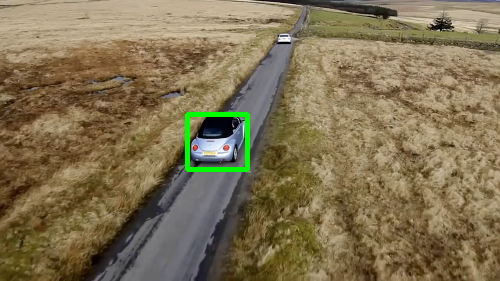


***
###**Download video and load libraries**
Download video to be tracked.

There is also the option to load our video from a gDrive (commented in the code).

In [1]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18FWKN56QjLDOrVj2DLx2IUZTQrLVPQwF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18FWKN56QjLDOrVj2DLx2IUZTQrLVPQwF" -O video.mp4 && rm -rf /tmp/cookies.txt

video.mp4           100%[===================>]   7.28M  37.6MB/s    in 0.2s    


**Import libraries**:
  * cv2 is openCV
  * os and drive are used in order to read files from google drive

In [ ]:
import cv2
import os
# from google.colab import drive
# from google.colab.patches import cv2_imshow

In the following code section we give access to our gDrive.

In [ ]:
# drive.mount('/content/gdrive')
# base_path = '/content/gdrive/My Drive/shared/tracking_school2020/files/'

***
###**Define the input video stream and output**

Here we set the video stream (vs) which can be:
* our webcam (we enter 0 instead of a path to a video) but the code should be running locally at our own machine,
* a local video file or path to a gDrive file (example commented below).

Because in Google Colab it is not easy to play video, we save the tracking results to a new video given in output_file variable. The output can be saved directly to a gDrive (commented).

The parameters of our new video should match the input video. Here they are hardcoded but we can read the first frame of the video and then initialize the parameters of video output.

In [ ]:
# set video stream
# open webcam
# vs = cv2.VideoCapture(0)
# vs = cv2.VideoCapture(os.path.join(base_path, 'drone/video.mp4'))
vs = cv2.VideoCapture('video.mp4')

# output file
output_file = os.path.join('out.mp4')


# parameters for saving video output
frame_width = 500
frame_height = 281
fourcc = cv2.VideoWriter_fourcc(*'FMP4')
video = cv2.VideoWriter(output_file, fourcc, float(25), (frame_width, frame_height))

###**Selection of the desired tracker**

In our example we will use KCF as our desired tracker.

OpenCV has impplementations of other trackers as well. Below examples of how to create each tracker with OpenCV are given:
* "CSRT": cv2.TrackerCSRT_create,
* **"KCF": cv2.TrackerKCF_create**,
* "Boosting": cv2.TrackerBoosting_create,
* "MIL": cv2.TrackerMIL_create,
*	"TLD": cv2.TrackerTLD_create,
* "MedialFlow": cv2.TrackerMedianFlow_create,
*	"MOSSE": cv2.TrackerMOSSE_create.

[Documentation](https://docs.opencv.org/4.5.2/dc/d6b/group__video__track.html)

In [ ]:
tracker = cv2.TrackerKCF_create()

###**Initialize variables**

Set initialization variables for the tracker. initBB is the location of the initial bounding box.

In [ ]:
initialized = False
initBB = tuple([187, 114, 60, 55])

### **Tracking process**

Here, while the video sequence is not finished, we obtain the next video frame and perform 2D visual target tracking using the KCF algorithm provided by the OpenCV library. The results are saved in the path of *output_video*.

In [ ]:
while True:
  ret, frame = vs.read()
  if not ret:
    break


  (H, W, D) = frame.shape
  r = 500.0/W
  dim = (500, int(H*r))
  frame = cv2.resize(frame, dim)

  if not initialized:
    # select ROI
    # initBB = cv2.selectROI("Frame", frame, fromCenter=False, showCrosshair=True)
    tracker.init(frame, initBB)
    initialized = True

  (success, box) = tracker.update(frame)
  if success:
    (x, y, w, h) = [int(v) for v in box]
    output = frame.copy()
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 4)
    video.write(output)
    # cv2.imshow('tracking result',output)

vs.release()
video.release()
cv2.destroyAllWindows()